<a href="https://colab.research.google.com/github/Auryvilia/Machine_Learning/blob/main/tugas_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8877777777777778
Precision: 0.7538461538461538
Recall: 0.735
F1-Score: 0.7443037974683544

Confusion Matrix:
 [[6520  480]
 [ 530 1470]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93      7000
           1       0.75      0.73      0.74      2000

    accuracy                           0.89      9000
   macro avg       0.84      0.83      0.84      9000
weighted avg       0.89      0.89      0.89      9000



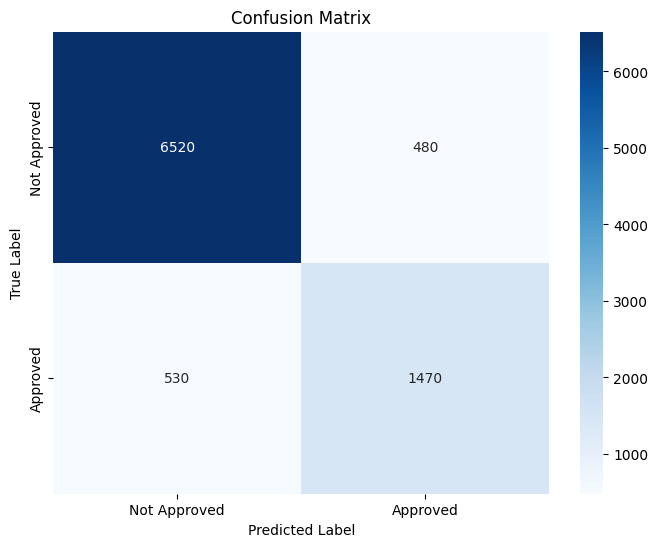

In [ ]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Load dataset
file_path = "/content/loan_data (1).csv"  # Ganti dengan path file Anda
data = pd.read_csv(file_path)

# Prepare features (X) and target (y)
X = data.drop(columns=["loan_status"])  # Drop target column
y = data["loan_status"]  # Target column

# One-hot encoding for categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

# Initialize Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("\nConfusion Matrix:\n", conf_matrix)

# Optional: Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Approved", "Approved"], yticklabels=["Not Approved", "Approved"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


**Hasil evaluasi model Logistic Regression dengan metrik berikut:**

1. Accuracy: 88.78%, Model memprediksi dengan benar sebanyak 88.78% dari total data uji.

2. Precision: 75.38%, Dari semua prediksi "Approved", sebanyak 75.38% adalah benar.

3. Recall: 73.50%, Dari semua kasus sebenarnya "Approved", model berhasil mendeteksi 73.50%.

4. F1 Score: 74.43%, Rata-rata harmonik antara presisi dan recall menunjukkan keseimbangan kinerja model.



Confusion Matrix:

* True Negative (TN) = 6,520, Model memprediksi Not Approved, dan hasilnya benar.
* False Positive (FP) = 480, Model memprediksi Approved, tetapi seharusnya Not Approved (kesalahan prediksi positif).
* True Positive (TP) = 1,470, Model memprediksi Approved, dan hasilnya benar.
* False Negative (FN) = 530, Model memprediksi Not Approved, tetapi seharusnya Approved (kesalahan prediksi negatif).


Model memiliki kinerja yang cukup baik dengan akurasi tinggi (88.78%) dan F1-Score yang seimbang (74.43%). Namun, terdapat ruang untuk meningkatkan Recall sehingga model bisa lebih baik dalam mendeteksi semua kasus "Approved".